In [1]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Gender Classification

## Steps
* Problem Definition
* Exploratory Data Analysis
* Data Preprocessing 
* Model Building
* Predictions and Submission

### Problem Definition

To build a model to predict whether a person's gender can be predicted with an accuracy significantly above 50% based on their personal preferences.

### Exploratory Data Analysis

In [4]:
!pip3 install catboost

In [5]:
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML Libraries
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [6]:
# Reading training and testing data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [7]:
# Training data sample
train_data.sample()

,ID,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
33,34,Warm,Rock,Vodka,7UP/Sprite,M


In [8]:
# Test data sample
test_data.sample()

,ID,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,56,Cool,Rock,Vodka,7UP/Sprite,F


In [9]:
# Training data shape
train_data.shape

(55, 6)

In [10]:
# test data shape
test_data.shape

(11, 6)

In [11]:
# Unique values in training data
train_data.nunique()

ID                      55
Favorite Color           3
Favorite Music Genre     7
Favorite Beverage        6
Favorite Soft Drink      4
Gender                   2
dtype: int64

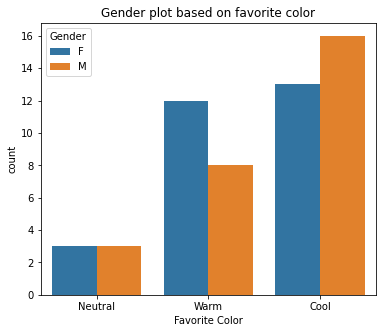

In [13]:
# Plotting gender based on favorite color

plt.figure(figsize=(6,5))
ax = sns.countplot(data=train_data,x = 'Favorite Color',hue = 'Gender')

    
plt.title('Gender plot based on favorite color')
plt.show()

* Seems Cool colors favored by Male and Warm colors favored by Female persons

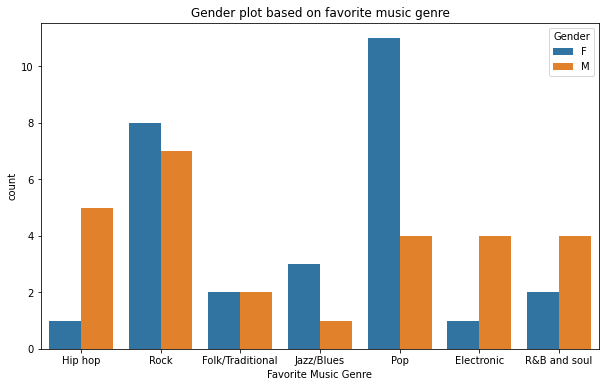

In [14]:
# Plotting gender based on favorite music genre

plt.figure(figsize=(10,6))
ax = sns.countplot(data=train_data,x = 'Favorite Music Genre',hue = 'Gender')


    
plt.title('Gender plot based on favorite music genre')
plt.show()

* Overall Pop and Rock music are mostly loved among all
* Hip hop, Electronic and R&B and soul music loved by Male persons
* Pop and Jazz/Blues mostly loved by Female persons
* Seems Rock music and Folk/Traditional loved equally

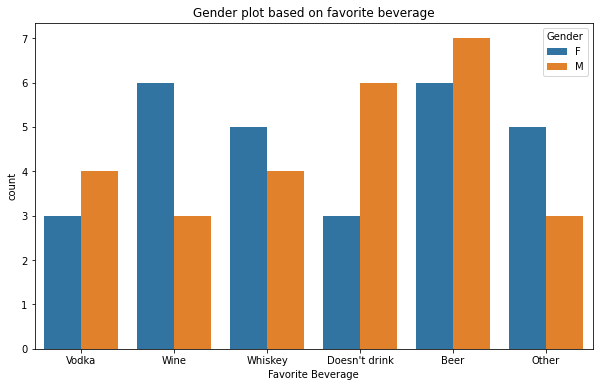

In [15]:
# Plotting gender based on favorite beverage

plt.figure(figsize=(10,6))
ax = sns.countplot(data=train_data,x = 'Favorite Beverage',hue = 'Gender')


    
plt.title('Gender plot based on favorite beverage')
plt.show()

* Beer is the most loved bevarage among all and most loved by male persons also
* Seems Wine is the favorite for female persons

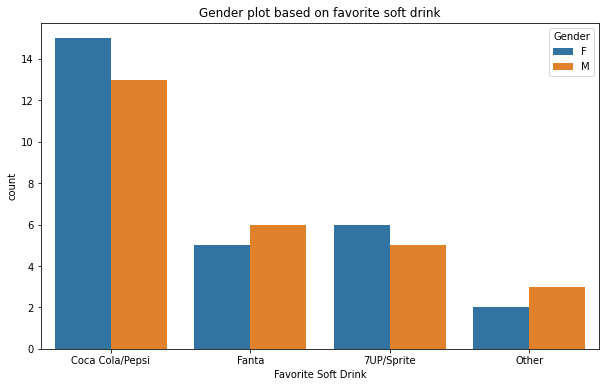

In [16]:
# Plotting gender based on favorite beverage

plt.figure(figsize=(10,6))
ax = sns.countplot(data=train_data,x = 'Favorite Soft Drink',hue = 'Gender')

plt.title('Gender plot based on favorite soft drink')
plt.show()

* Most of the people loved Coca Cola/Pepsi

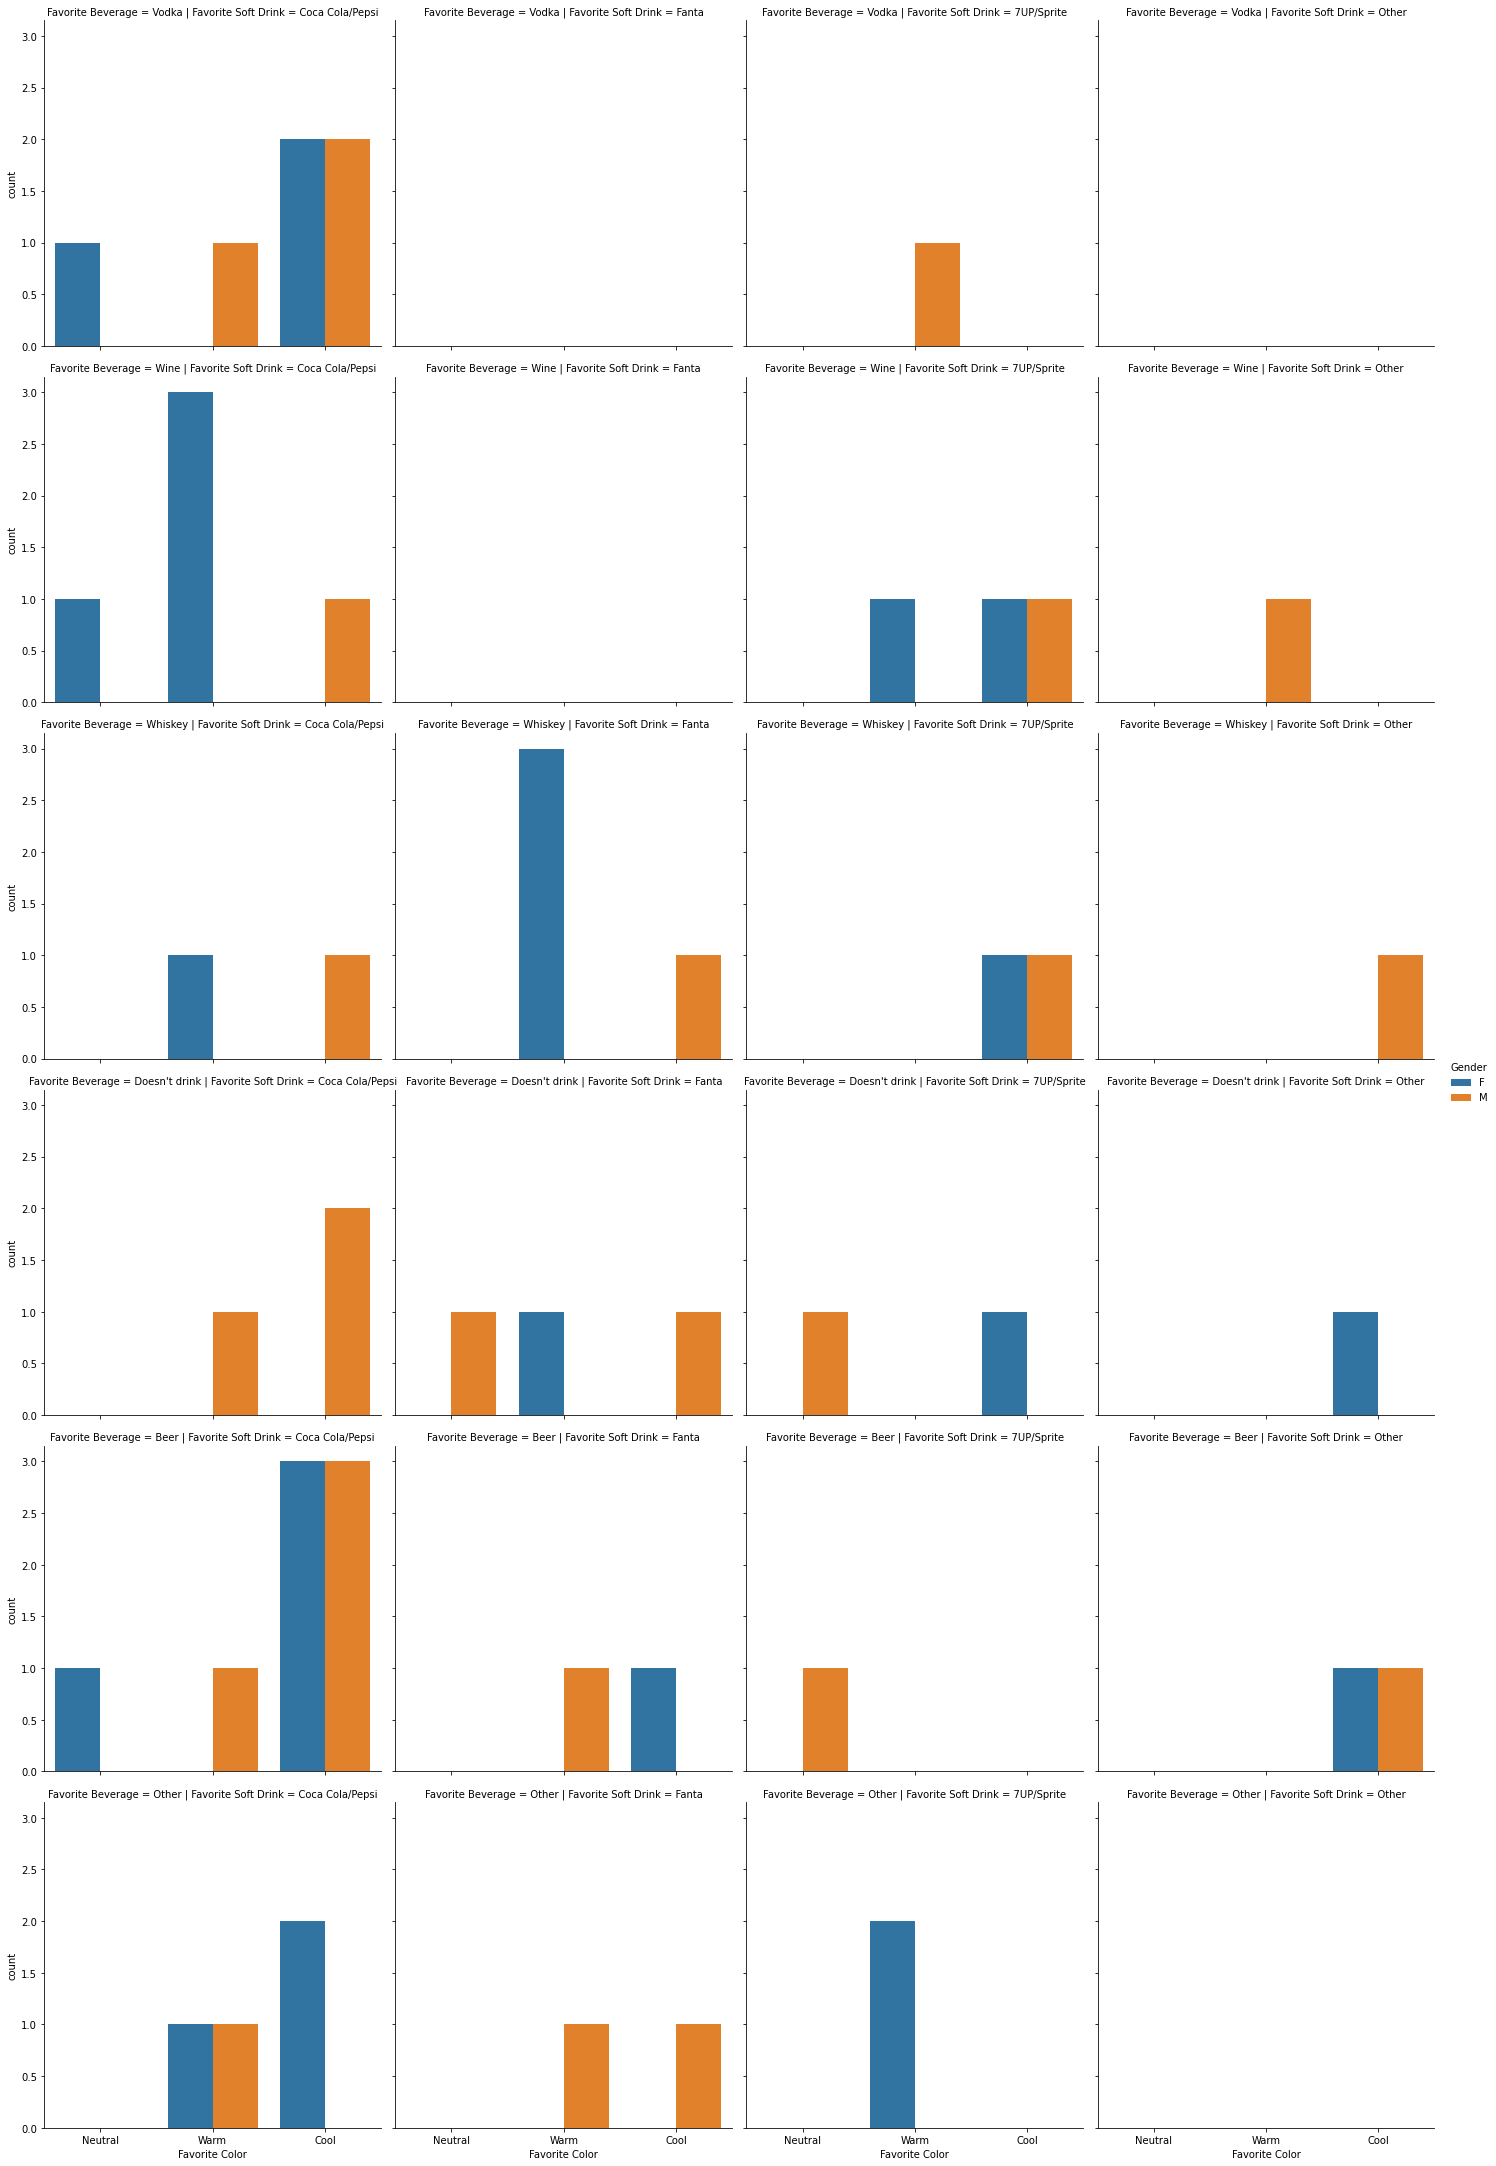

In [17]:
sns.catplot(data=train_data,x = 'Favorite Color',col='Favorite Soft Drink',row='Favorite Beverage',\
            legend=True,hue = 'Gender',kind = 'count')
plt.show()

Some Insights from the above chart
* There are no persons with favorite color is neutral, favorite beverage & soft drinks with other
* If favorite color is warm and favorite beverage is other and favorite soft drink is 7up/sprite, it must be Female
* If favorite color is neutral and favorite beverage is beer and favorite soft drink is 7up/sprite, then it is Male
* There are no persons liking with beverage vodka, soft drink Fanta & others
* If beverage is vodka and soft drink is 7up/sprite, then they are Male persons
* If soft drink is other and favorite beverages wine/whiskey, they are Male persons
* Those who does not drink and like coca cola/pepsi soft drinks, they are Female
* Those who does not drink and like soft drink other, then they are Male

### Data Preprocessing

In [18]:
# Checking for missing values
train_data.isna().sum()

ID                      0
Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

* No missing values

In [19]:
# Checking data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    55 non-null     int64 
 1   Favorite Color        55 non-null     object
 2   Favorite Music Genre  55 non-null     object
 3   Favorite Beverage     55 non-null     object
 4   Favorite Soft Drink   55 non-null     object
 5   Gender                55 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.7+ KB


In [20]:
# Separating features and target
X_train = train_data.drop(['ID','Gender'],axis=1)
y_train = train_data['Gender']

X_test = test_data.drop(['ID','Gender'],axis=1)
y_test = test_data['Gender']

### Model Building

In [21]:
# Catboost model
model = CatBoostClassifier(iterations=3,learning_rate=1,max_depth=2,loss_function='Logloss')
model.fit(X_train,y_train,cat_features = ['Favorite Color','Favorite Music Genre','Favorite Beverage','Favorite Soft Drink'],\
          verbose=False)

### Predictions and Submission

In [22]:
# Predictions
y_pred = model.predict(X_test)

In [23]:
# Model Accuracy score
print("Model Accuracy Score on Test data: ",round(accuracy_score(y_test,y_pred),2))

Model Accuracy Score on Test data:  0.73


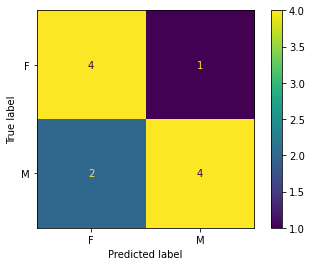

In [24]:
# Confusion matrix
cm = confusion_matrix(y_test,y_pred,labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = model.classes_)
display.plot()
plt.show()

In [25]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           F       0.67      0.80      0.73         5
           M       0.80      0.67      0.73         6

    accuracy                           0.73        11
   macro avg       0.73      0.73      0.73        11
weighted avg       0.74      0.73      0.73        11



In [27]:
# Submitting results
y_pred = pd.DataFrame(y_pred,columns = ['Gender'])
y_pred['Gender'] = y_pred['Gender'].map({'M':1,'F':0})
y_id = pd.DataFrame(test_data.ID)

submission = pd.concat([y_id,y_pred],axis=1)
submission.to_csv('submission.csv',index=False)